In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv("../input/trailblazers-south-african-qualification-challenge/Train (5).csv")
test_df=pd.read_csv("../input/trailblazers-south-african-qualification-challenge/Test (7).csv")
sub=pd.read_csv("../input/trailblazers-south-african-qualification-challenge/SampleSubmission (3).csv")

In [4]:
Id=test_df["Place_ID X Date"]

In [5]:
train_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
L=[i for i in train_df.columns if i not in test_df.columns]
L

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

In [7]:
train_df["target"].nunique()

375

In [8]:
train_df.isna().sum().sort_values(ascending =False).head(20)

L3_CH4_solar_zenith_angle                              24765
L3_CH4_solar_azimuth_angle                             24765
L3_CH4_sensor_zenith_angle                             24765
L3_CH4_sensor_azimuth_angle                            24765
L3_CH4_aerosol_optical_depth                           24765
L3_CH4_aerosol_height                                  24765
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          24765
L3_NO2_tropospheric_NO2_column_number_density           8669
L3_HCHO_tropospheric_HCHO_column_number_density_amf     7425
L3_HCHO_tropospheric_HCHO_column_number_density         7425
L3_HCHO_solar_zenith_angle                              7425
L3_HCHO_solar_azimuth_angle                             7425
L3_HCHO_sensor_zenith_angle                             7425
L3_HCHO_sensor_azimuth_angle                            7425
L3_HCHO_cloud_fraction                                  7425
L3_HCHO_HCHO_slant_column_number_density                7425
L3_SO2_absorbing_aerosol

In [9]:
train_df.isna().sum().sort_values(ascending =False).head(20)/len(train_df)

L3_CH4_solar_zenith_angle                              0.810453
L3_CH4_solar_azimuth_angle                             0.810453
L3_CH4_sensor_zenith_angle                             0.810453
L3_CH4_sensor_azimuth_angle                            0.810453
L3_CH4_aerosol_optical_depth                           0.810453
L3_CH4_aerosol_height                                  0.810453
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          0.810453
L3_NO2_tropospheric_NO2_column_number_density          0.283699
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.242989
L3_HCHO_tropospheric_HCHO_column_number_density        0.242989
L3_HCHO_solar_zenith_angle                             0.242989
L3_HCHO_solar_azimuth_angle                            0.242989
L3_HCHO_sensor_zenith_angle                            0.242989
L3_HCHO_sensor_azimuth_angle                           0.242989
L3_HCHO_cloud_fraction                                 0.242989
L3_HCHO_HCHO_slant_column_number_density

In [10]:
train_df.drop(["L3_CH4_solar_zenith_angle","L3_CH4_solar_azimuth_angle","L3_CH4_sensor_zenith_angle","L3_CH4_sensor_azimuth_angle","L3_CH4_aerosol_optical_depth",
             "L3_CH4_aerosol_height","L3_CH4_CH4_column_volume_mixing_ratio_dry_air","Place_ID X Date","Place_ID"], axis=1, inplace=True)

In [11]:
train_df.shape

(30557, 73)

In [12]:
import datetime as dt
train_df["Date"]=pd.to_datetime(train_df["Date"])
train_df['Date_year'] =train_df["Date"].dt.year
train_df['Date_month'] = train_df["Date"].dt.month
train_df['Date_day'] = train_df["Date"].dt.day
train_df.drop("Date", axis=1, inplace=True)

In [13]:
df_train=train_df.drop("target",axis=1)

In [14]:
test_df.drop(["L3_CH4_solar_zenith_angle","L3_CH4_solar_azimuth_angle","L3_CH4_sensor_zenith_angle","L3_CH4_sensor_azimuth_angle","L3_CH4_aerosol_optical_depth",
             "L3_CH4_aerosol_height","L3_CH4_CH4_column_volume_mixing_ratio_dry_air","Place_ID X Date","Place_ID"], axis=1, inplace=True)

test_df["Date"]=pd.to_datetime(test_df["Date"])
test_df['Date_year'] =test_df["Date"].dt.year
test_df['Date_month'] = test_df["Date"].dt.month
test_df['Date_day'] = test_df["Date"].dt.day
test_df.drop("Date", axis=1, inplace=True)

In [15]:
df_test=test_df

In [16]:
y_train = train_df[["target"]]

In [17]:
df_train.isna().sum()

target_min                                 0
target_max                                 0
target_variance                            0
target_count                               0
precipitable_water_entire_atmosphere       0
                                        ... 
L3_SO2_solar_azimuth_angle              7237
L3_SO2_solar_zenith_angle               7237
Date_year                                  0
Date_month                                 0
Date_day                                   0
Length: 74, dtype: int64

In [18]:
import random
missing_values = df_train.columns[df_train.isna().any()].to_list()
for each in missing_values:
    if (df_train[each].dtypes =='float64'):
        minimum= int(df_train[each].quantile(0.25))
        maximum= int(df_train[each].quantile(0.75))
        A=df_train[df_train[each].isnull()].index.tolist()
        for i in A:
            df_train.loc[i,each]=random.randint(minimum,maximum)
        df_train[each]=pd.to_numeric(df_train[each])
   

    elif(df_train[each].dtypes == 'object'):
        if ('True' in str(df_train[each].str.contains('No').unique().tolist())):
            df_train[each].fillna('No',inplace=True)
        elif('True' in str(df_train[each].str.contains('None').unique().tolist())):
            df_train[each].fillna('None',inplace=True)
        elif('True' in str(df_train[each].str.contains('Unf').unique().tolist())):
            df_train[each].fillna('Unf',inplace=True)
        else:
            A=df_train[df_train[each].isnull()].index.tolist()
            unique = df_train[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_train.loc[i,each]=random.choice(unique)


missing_values = df_test.columns[df_test.isna().any()].to_list()
for each in missing_values:
    if (df_test[each].dtypes =='float64'):
        minimum= int(df_test[each].quantile(0.25))
        maximum= int(df_test[each].quantile(0.75))
        A=df_test[df_test[each].isnull()].index.tolist()
        for i in A:
            df_test.loc[i,each]=random.randint(minimum,maximum)
        df_test[each]=pd.to_numeric(df_test[each])
   

    elif(df_test[each].dtypes == 'object'):
        if ('True' in str(df_test[each].str.contains('No').unique().tolist())):
            df_test[each].fillna('No',inplace=True)
        elif('True' in str(df_test[each].str.contains('None').unique().tolist())):
            df_test[each].fillna('None',inplace=True)
        elif('True' in str(df_test[each].str.contains('Unf').unique().tolist())):
            df_test[each].fillna('Unf',inplace=True)
        else:
            A=df_test[df_test[each].isnull()].index.tolist()
            unique = df_test[each].unique().tolist()
            unique=pd.Series(unique).dropna().tolist()
            for i in A:
                df_test.loc[i,each]=random.choice(unique)

In [19]:
df_train.drop(['target_min', 'target_max', 'target_variance', 'target_count'], axis=1, inplace=True)

In [20]:
df_train.shape, df_test.shape

((30557, 70), (16136, 70))

In [ ]:
df_train["std"]=df_train.tsd(axis=1)
df_train["mean"]=df_train.mean(axis=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(df_train)
X_test = mms.transform(df_test)

In [23]:
y_train = mms.fit_transform(y_train)

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.1)

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
rd_xtrain = pca.fit_transform(xtrain)
rd_xtest = pca.transform(xtest)

In [26]:
x_test=pca.fit_transform(X_test)[:,:20]

In [27]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(70,)

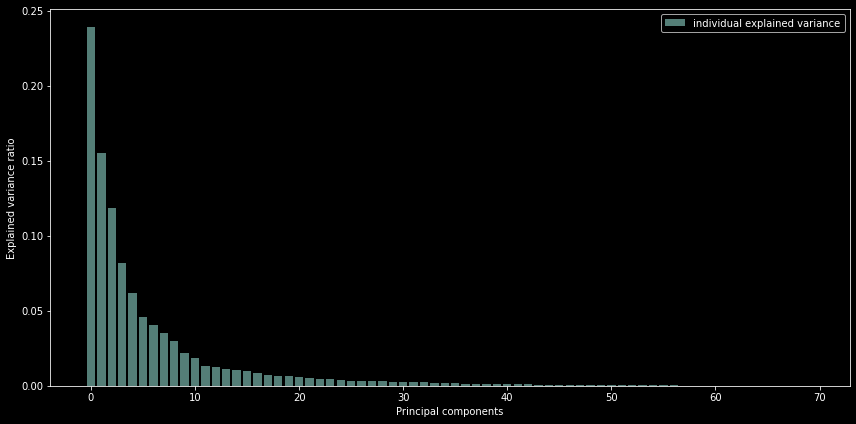

In [28]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 6))

    plt.bar(range(70), explained_variance, alpha=0.6, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [29]:
xtrain_ = rd_xtrain[:, :20]
xtest_ = rd_xtest[:, :20]

In [30]:
xtrain_.shape, xtest_.shape

((27501, 20), (3056, 20))

In [31]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(min_samples_split=15)
Rf.fit(xtrain_, ytrain)
ypred=Rf.predict(xtest_)

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

0.0026974876401651133

In [33]:
Rf.fit(xtest_, ytest)

RandomForestRegressor(min_samples_split=15)

In [34]:
y_pred4 = Rf.predict(x_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))


In [35]:
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]
submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original4})
submission.to_csv('submission7.csv', index=False)

****

In [36]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(min_samples_split=2, min_samples_leaf=10, max_features=1, max_leaf_nodes=8)
Rf.fit(xtrain_, ytrain)
yprede=Rf.predict(xtest_)
mean_squared_error(ytest, yprede)

0.0035457683226375976

****

In [37]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(xtrain_, ytrain)
ypredd=Ls.predict(xtest_)
mean_squared_error(ytest, ypredd)

0.003767977089795762

In [38]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor(max_depth=8)
mytre.fit(xtrain_, ytrain)
ypreddd=mytre.predict(xtest_)
mean_squared_error(ytest, ypreddd)

0.003290519265206788

****

In [39]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=20)
KNN.fit(xtrain_, ytrain)
ypredk=KNN.predict(xtest_)
mean_squared_error(ytest, ypredk)

0.0030429004512927006

****

In [40]:
from sklearn.linear_model import RANSACRegressor
pf=RANSACRegressor()
pf.fit(xtrain_, ytrain)
ypredp=pf.predict(xtest_)
mean_squared_error(ytest, ypredp)

0.007934529199838404

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_, ytrain)
ypredp=lr.predict(xtest_)
mean_squared_error(ytest, ypredp)

0.0033411284990326933

****

In [46]:
from sklearn.svm import SVR
sv =SVR()
sv.fit(xtrain_, ytrain)
ypredv=sv.predict(xtest_)
mean_squared_error(ytest, ypredv)

0.003895399735485385

****

In [65]:
from sklearn import  ensemble
params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(xtrain_, ytrain)
mse = mean_squared_error(ytest, reg.predict(xtest_))

In [66]:
mse

0.0027144070311695924

In [68]:
reg.fit(xtest_, ytest)
y_pred4 = reg.predict(x_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]
submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original4})
submission.to_csv('submission11.csv', index=False)

****

In [69]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror')
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, xtrain_, ytrain, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MSE: -0.002 (0.000)


In [70]:
model.fit(xtrain_, ytrain)
yhat = model.predict(xtest_)

In [71]:
mean_squared_error(ytest, yhat)

0.0028089934216344653

In [72]:
model.fit(xtest_, ytest)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
y_pred4 = model.predict(x_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]
submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original4})
submission.to_csv('submission12.csv', index=False)

****

In [61]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model1 = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, xtrain_, ytrain, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.5f (%.5f)' % (mean(n_scores), std(n_scores)))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

MAE: -0.00237 (0.00018)


In [74]:
model1 = LGBMRegressor()
model1.fit(xtrain_, ytrain)
yhatt = model1.predict(xtest_)
mean_squared_error(ytest, yhatt)

0.002740489197053361

In [75]:
model1.fit(xtest_, ytest)

LGBMRegressor()

In [76]:
y_pred4 = model1.predict(x_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]
submission = pd.DataFrame({'Place_ID X Date	': Id,'target': y_pred_original4})
submission.to_csv('submission13.csv', index=False)

In [ ]:
mean_squared_error(ytest, yhat)